In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
import copy 

In [2]:
' funcion que toma una matriz y un vector normalizado  y devuelve el valor esperado y la desviación '
def vev_sig(A, ket):

    assert np.round(np.sqrt(np.dot(ket.conj().T,ket)[0,0]).real,5)  == 1. # chequeamos que la norma es unidad
    bra = ket.conj().T
    
    'el valor esperado'
    vev = np.dot(bra,np.dot(A,ket))[0,0].real
   
    'la varianza'
    A2 = np.dot(A,A)
    var= np.dot(bra,np.dot(A2,ket))[0,0] - vev**2
    sig = np.sqrt(np.abs(var.real))
    
    return(np.round(vev,5), np.round(sig,10))

In [3]:
' definamos una matriz hermítica '
#np.random.seed(10) 
A = np.matrix(np.random.randn(3,3) + np.random.randn(3,3)*1j)
A +=  A.getH()
eigvals, eigvecs = np.linalg.eigh(A)
' mostramos los autovalores '
np.round(eigvals,4)

array([-1.3914,  0.983 ,  2.9971])

In [4]:
'definamos un ket'
vec1 = np.random.randn(len(A),1)   # este es un autovector aleatorio
vec2 = eigvecs[:,0]           # este es el autovector de autovalor mínimo
vec3 = eigvecs[:,-1]          # éste es un autovector de autovalor máximo

ket = vec2       # elegimos uno 

'normalizado'
norma=np.sqrt(np.dot(ket.conj().T,ket)[0,0]).real 
uket = ket/norma


vev, sig = vev_sig(A,uket)

print('<A>= ',vev, ' sigma = ', sig)


<A>=  -1.39136  sigma =  1.49e-08


In [5]:
def psi(t,psi0,H):
    lpsi = len(psi0)
    lH = H.shape[0]
    assert lpsi == lH
    
    psi0ket =np.array(psi0).reshape(lpsi,1)
    psitket = np.dot(expm(- 1j*t*H),psi0ket)
    return psitket

In [6]:
from matplotlib import pyplot as plt
from scipy.linalg import expm

' definamos un Hamiltoniano '
A = np.random.randn(2,2) + np.random.randn(2,2)*1j
A = np.asmatrix(A)
H = A + A.getH()

'estado inicial |psi(0)>'
psi0 = [1,0]

tend = 2
steps = 100
tlist= np.linspace(0,tend, steps + 1)

'estado a tiempo t |psi(t)>'
psitketlist = [psi(tlist[i],psi0,H) for i in range(len(tlist))]

'probabilidades'
p00list = [np.abs(psitketlist[i][0,0])  for i in range(len(tlist))]
p01list = [np.abs(psitketlist[i][1,0])  for i in range(len(tlist))]

'valores esperados <H>(t)'
psitbralist= [psitketlist[i].conj().reshape(1,2) for i in range(len(tlist))]
Hvevtlist = [np.dot(psitbralist[i],np.dot(H,psitketlist[i])).real[0,0] for i in range(len(tlist))]


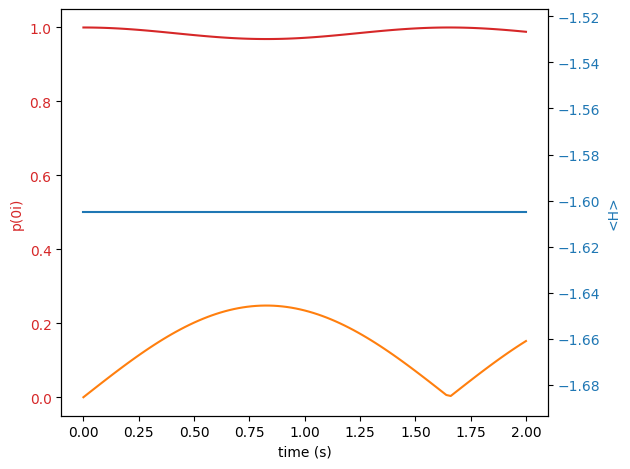

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('p(0i)', color= 'tab:red')
ax1.plot(tlist,p00list, color= 'tab:red')
ax1.plot(tlist,p01list, color= 'tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('<H>', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(tlist,Hvevtlist, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()